In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
from sklearn import datasets, linear_model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy import stats
import scipy

In [2]:
data=pd.read_excel("dataset.xlsx",index_col="Name")


In [3]:
data.head(3) #First 3 samples of the our dataset:

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
Name,,,,,,,,,,,,,,,,
Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


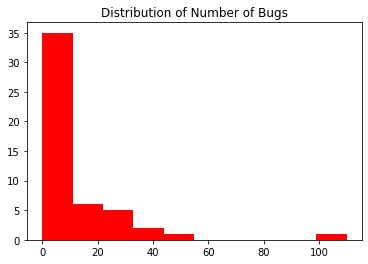

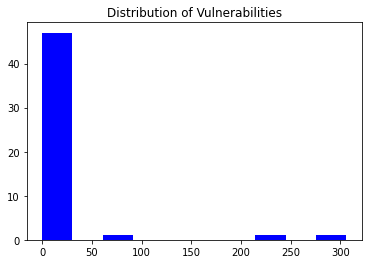

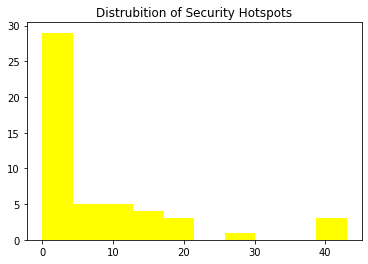

In [4]:
#show the distribution of 3 metrics
def plotHist(columnIndex,columnName,colorName):
    data[columnIndex].plot(kind="hist",color=colorName)
    plt.title(columnName)
    plt.ylabel("")
    plt.show()
plotHist("NOB","Distribution of Number of Bugs","red")
plotHist("V","Distribution of Vulnerabilities","blue")
plotHist("SH","Distrubition of Security Hotspots","yellow")


In [5]:
data3 = pd.DataFrame(MinMaxScaler().fit_transform(data))
mylist=["NOB","V","SH","CS","CDR","TD","NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"]
for i in range(0,16):
    data3[mylist[i]]=data3[i]
newdata=data3.drop(axis=1,labels=[i for i in range(0,16)])
x=list(data.index.values.tolist())
newdata=newdata.rename(axis=0,mapper={i:x[i] for i in range(0,50)})
newdata.index.name="Name"
externalmetrics=newdata.drop(axis=1,labels=["NOC","CBO","LCOM","FanIn","FanOut","RFC","DIT","WMC","LOC","CLOC","CDR","TD"])
internalmetrics=newdata.drop(axis=1,labels=["CDR","TD","NOB","V","SH","CS"])
tdmetrics=newdata.drop(axis=1,labels=["NOB","V","SH","CS","NOC","CBO","LCOM","FanIn","FanOut","RFC","DIT","WMC","LOC","CLOC"])
newdata


,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
Name,,,,,,,,,,,,,,,,
Alarmio-master,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
AndroidAsyncHTTP-master,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
android-pdf-viewer-master,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
android-permission-handler-master,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
Android-WhatsApp-master,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
android-youtubeExtractor-master,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
androidtv-sample-inputs-master,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
BirthdayBuddy-master,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
dex2jar,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359


In [6]:
correlationmatrix=newdata.corr(method="spearman")
correlationmatrix


,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [8]:
def myfunc(a,b):
    return scipy.stats.spearmanr(a,b)[1]
pvalues=newdata.corr(method=myfunc)
for i in range(0,16):
    for b in range(0,16):
        pvalues.iloc[i,b]=round(pvalues.iloc[i,b],4)
pvalues

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,1.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,1.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,1.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,1.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,1.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,1.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,1.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,1.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,1.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


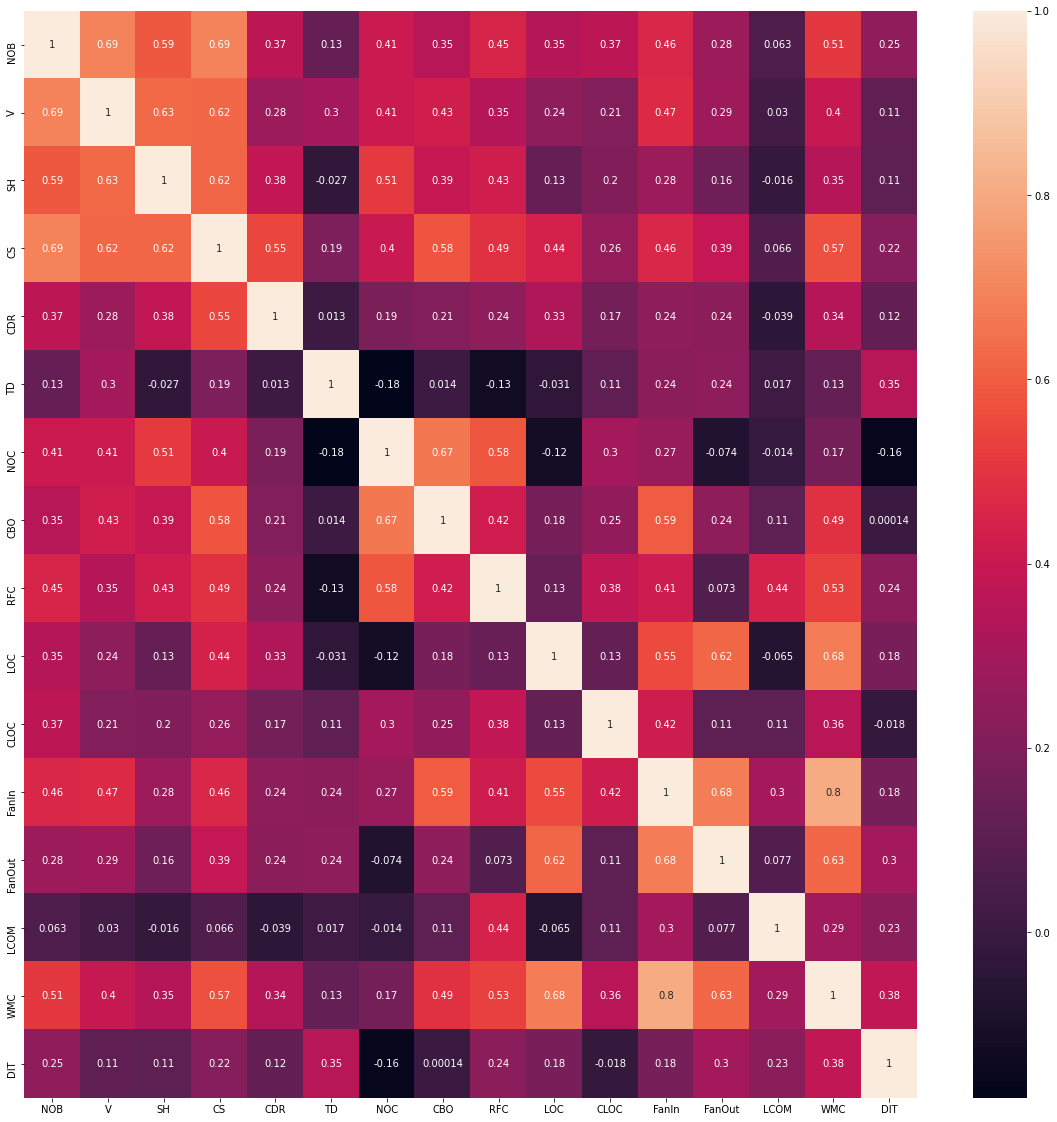

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(correlationmatrix,annot=True)
plt.show()

In [10]:
compare_e_td=pd.concat(axis=1,objs=[externalmetrics,tdmetrics])
correlationdata=compare_e_td.corr(method="spearman")
correlationdata

,NOB,V,SH,CS,CDR,TD
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000


In [11]:
#compare_i_td=pd.concat(axis=1,objs=[internalmetrics,tdmetrics])
compare_i_td=pd.concat(axis=1,objs=[internalmetrics,tdmetrics])
correlationdata=compare_i_td.corr(method="spearman")
correlationdata

,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT,CDR,TD
NOC,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788,0.192707,-0.179659
CBO,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144,0.212007,0.013652
RFC,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368,0.240992,-0.126364
LOC,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072,0.328527,-0.031098
CLOC,0.297347,0.250408,0.381636,0.126681,1.000000,0.416789,0.109636,0.107619,0.355080,-0.017867,0.171773,0.114297
FanIn,0.268289,0.594578,0.414878,0.554326,0.416789,1.000000,0.679297,0.296355,0.802910,0.179395,0.243709,0.239077
FanOut,-0.074350,0.240953,0.072564,0.618676,0.109636,0.679297,1.000000,0.076982,0.626327,0.295389,0.237237,0.240135
LCOM,-0.013518,0.109694,0.444076,-0.065455,0.107619,0.296355,0.076982,1.000000,0.291312,0.229251,-0.038683,0.017159
WMC,0.173468,0.492616,0.529367,0.678224,0.355080,0.802910,0.626327,0.291312,1.000000,0.381028,0.343628,0.127638
DIT,-0.163788,0.000144,0.237368,0.181072,-0.017867,0.179395,0.295389,0.229251,0.381028,1.000000,0.123330,0.352010


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
from sklearn import datasets, linear_model
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
random_state_fixed=53

#This function plots graphs to improve visual confirmation
#def plotGraph(y_test,y_pred,regressorName):
  #Plot the Scatter Graph to see results better



#Linear Regressor is one of the best choice for the data that is correlated linearly:

def linearRegression(X_train,y_train,x_test,y_test,metric):
  regr = linear_model.LinearRegression()
  regr.fit(X_train, y_train)
  plt.scatter(y_test,y_test,color="red",label="Original Value")
  plt.legend()
  plt.scatter(y_test,regr.predict(x_test),color="blue",label="Predicted Value")
  plt.legend()
  plt.title(f"Accuracy of Linear Regression ({metric})")
  plt.suptitle(f"Root Mean Squared Error: {mean_squared_error(y_test,regr.predict(x_test))**(1/2)}\nR Squared Value:{r2_score(y_test,regr.predict(x_test))}",y=1.1,fontsize=12)
  plt.show()


#SVR is also one of the most common regressor that used for regression predictions
def svrRegression(X_train,y_train,x_test,y_test,metric):
  regr = SVR(kernel='rbf')
  regr.fit(X_train,y_train)
  plt.scatter(y_test,regr.predict(x_test),color="blue",label="Predicted Value")
  plt.legend()
  plt.scatter(y_test,y_test,color="red",label="Original Value")
  plt.legend()
  plt.title(f"Accuracy of SVR Regression ({metric}) on RBF Kernel")
  plt.suptitle(f"Root Mean Squared Error: {mean_squared_error(y_test,regr.predict(x_test))**(1/2)}\nR Squared Value:{r2_score(y_test,regr.predict(x_test))}",y=1.1,fontsize=12)
  plt.show()
  regr = SVR(kernel='linear')
  regr.fit(X_train,y_train)
  plt.scatter(y_test,regr.predict(x_test),color="blue",label="Predicted Value")
  plt.legend()
  plt.scatter(y_test,y_test,color="red",label="Original Value")
  plt.legend()
  plt.title(f"Accuracy of SVR Regression ({metric}) on Linear Kernel")
  plt.suptitle(f"Root Mean Squared Error: {mean_squared_error(y_test,regr.predict(x_test))**(1/2)}\nR Squared Value:{r2_score(y_test,regr.predict(x_test))}",y=1.1,fontsize=12)
  plt.show()
def decisionTreeRegression(X_train,y_train,x_test,y_test,metric):
  regr = DecisionTreeRegressor(random_state=53)
  regr.fit(X_train, y_train)
  plt.scatter(y_test,y_test,color="red",label="Original Value")
  plt.legend()
  plt.scatter(y_test,regr.predict(x_test),color="blue",label="Predicted Value")
  plt.legend()
  plt.title(f"Accuracy of Decision Tree Regression ({metric})")
  plt.suptitle(f"Root Mean Squared Error: {mean_squared_error(y_test,regr.predict(x_test))**(1/2)}\nR Squared Value:{r2_score(y_test,regr.predict(x_test))}",y=1.1,fontsize=12)
  plt.show()
  
def randomDecTreeRegression(X_train,y_train,x_test,y_test,metric):
  regr = RandomForestRegressor(random_state=53)
  regr.fit(X_train, y_train)
  plt.scatter(y_test,y_test,color="red",label="Original Value")
  plt.legend()
  plt.scatter(y_test,regr.predict(x_test),color="blue",label="Predicted Value")
  plt.legend()
  plt.title(f"Accuracy of Random Decision Tree Regressor ({metric})")
  plt.suptitle(f"Root Mean Squared Error: {mean_squared_error(y_test,regr.predict(x_test))**(1/2)}\nR Squared Value:{r2_score(y_test,regr.predict(x_test))}",y=1.1,fontsize=12)
  plt.show()

def mlpRegressor(X_train,y_train,x_test,y_test,metric):
  regr = MLPRegressor(random_state=53).fit(X_train, y_train)
  regr.fit(X_train, y_train)
  plt.scatter(y_test,y_test,color="red",label="Original Value")
  plt.legend()
  plt.scatter(y_test,regr.predict(x_test),color="blue",label="Predicted Value")
  plt.legend()
  plt.title(f"Accuracy of Multi-layer Perceptron Regressor ({metric})")
  plt.suptitle(f"Root Mean Squared Error: {mean_squared_error(y_test,regr.predict(x_test))**(1/2)}\nR Squared Value:{r2_score(y_test,regr.predict(x_test))}",y=1.1,fontsize=12)
  plt.show()

In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [13]:
x=internalmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)


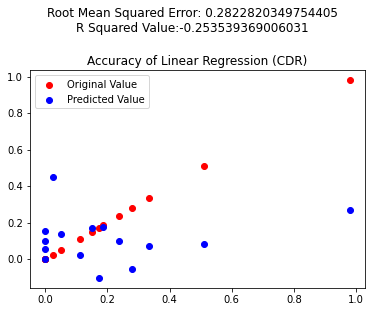

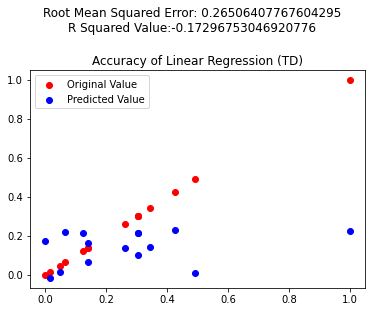

In [14]:
linearRegression(X_train,y_train,x_test,y_test,"CDR")
x=internalmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
linearRegression(X_train,y_train,x_test,y_test,"TD")

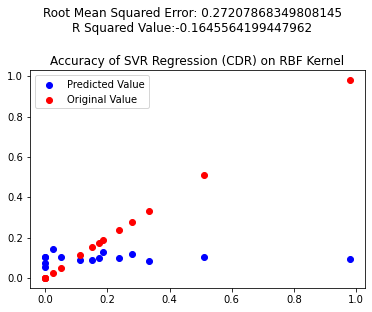

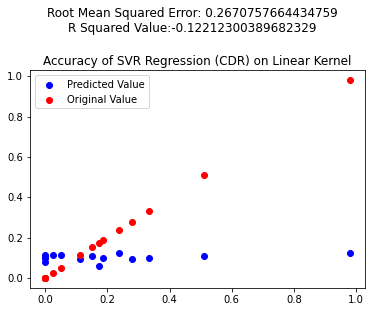

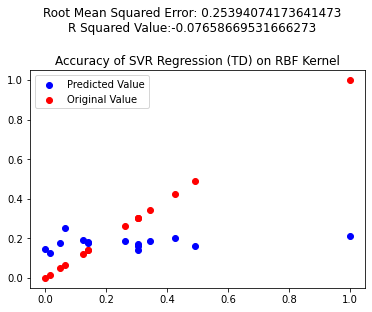

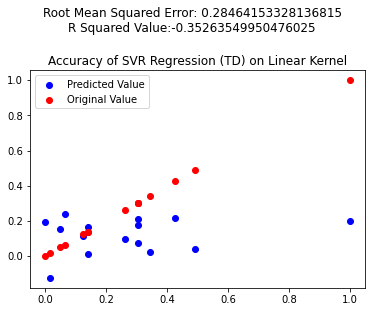

In [15]:
x=internalmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
svrRegression(X_train,y_train,x_test,y_test,"CDR")
x=internalmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
svrRegression(X_train,y_train,x_test,y_test,"TD")

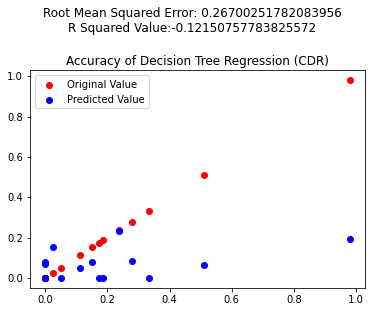

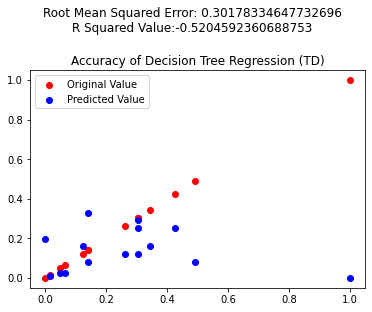

In [16]:
x=internalmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
decisionTreeRegression(X_train,y_train,x_test,y_test,"CDR")
x=internalmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
decisionTreeRegression(X_train,y_train,x_test,y_test,"TD")

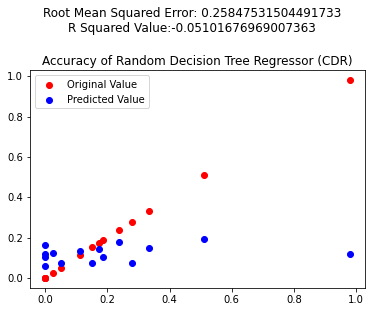

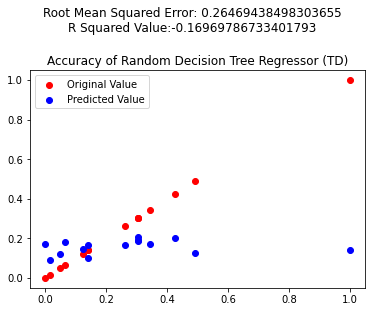

In [17]:
x=internalmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
randomDecTreeRegression(X_train,y_train,x_test,y_test,"CDR")
x=internalmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
randomDecTreeRegression(X_train,y_train,x_test,y_test,"TD")

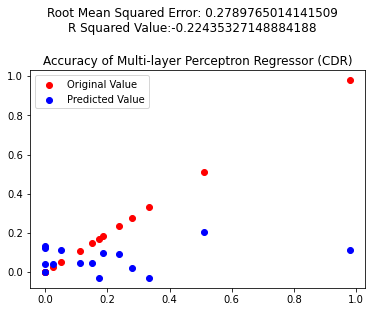

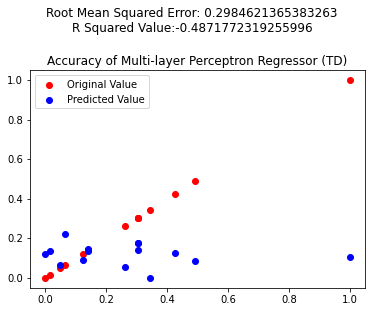

In [18]:
x=internalmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
mlpRegressor(X_train,y_train,x_test,y_test,"CDR")
x=internalmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
mlpRegressor(X_train,y_train,x_test,y_test,"TD")

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [19]:
x=externalmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)


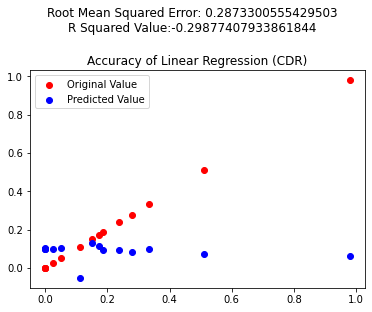

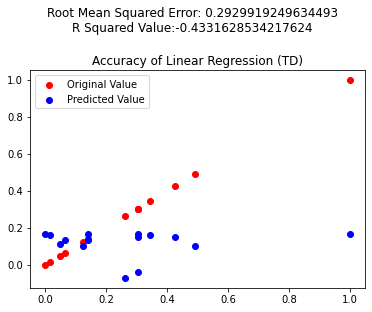

In [20]:
linearRegression(X_train,y_train,x_test,y_test,"CDR")
x=externalmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
linearRegression(X_train,y_train,x_test,y_test,"TD")

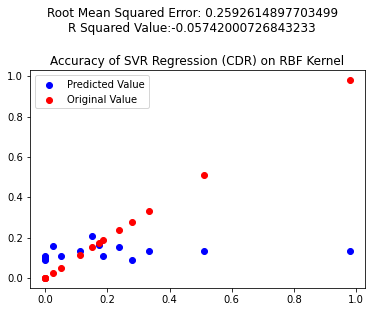

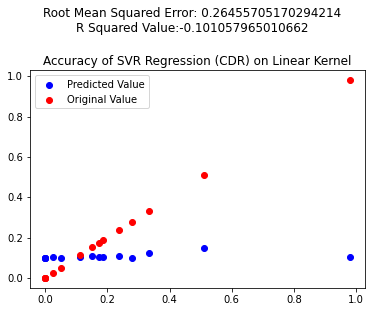

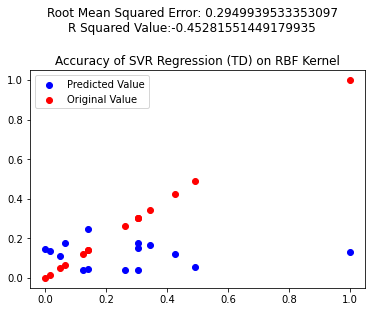

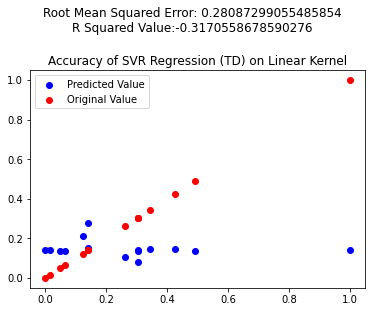

In [21]:
x=externalmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
svrRegression(X_train,y_train,x_test,y_test,"CDR")
x=externalmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
svrRegression(X_train,y_train,x_test,y_test,"TD")

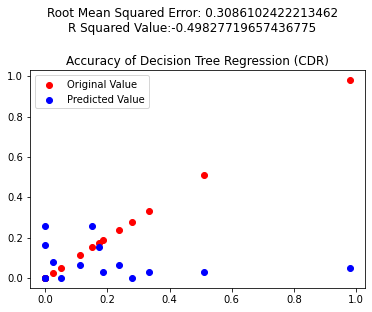

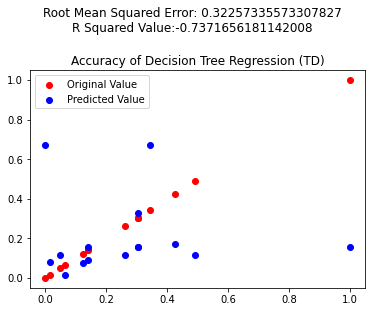

In [22]:
x=externalmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
decisionTreeRegression(X_train,y_train,x_test,y_test,"CDR")
x=externalmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
decisionTreeRegression(X_train,y_train,x_test,y_test,"TD")

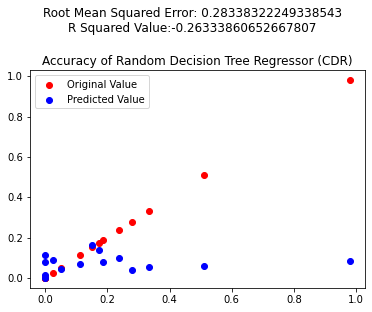

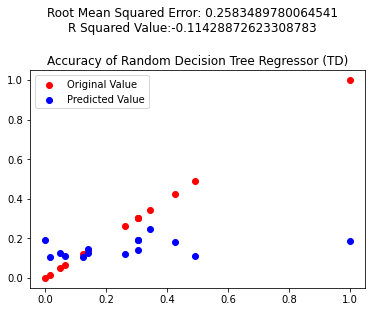

In [23]:
x=externalmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
randomDecTreeRegression(X_train,y_train,x_test,y_test,"CDR")
x=externalmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
randomDecTreeRegression(X_train,y_train,x_test,y_test,"TD")

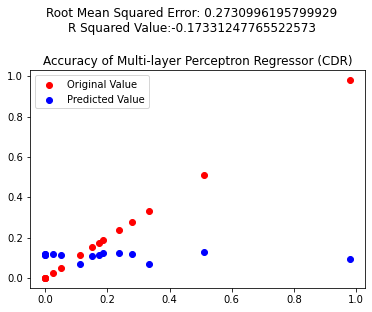

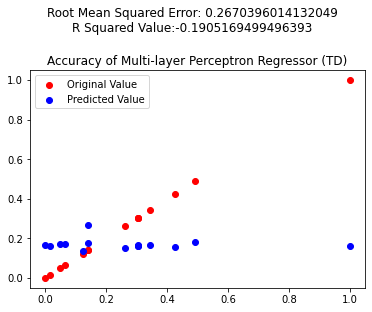

In [24]:
x=externalmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
mlpRegressor(X_train,y_train,x_test,y_test,"CDR")
x=externalmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
mlpRegressor(X_train,y_train,x_test,y_test,"TD")

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [25]:
allmetrics=newdata.drop(axis=1,labels=["CDR","TD"])
x=allmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)

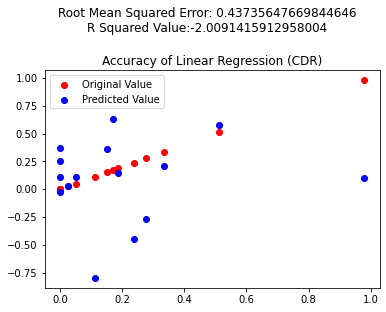

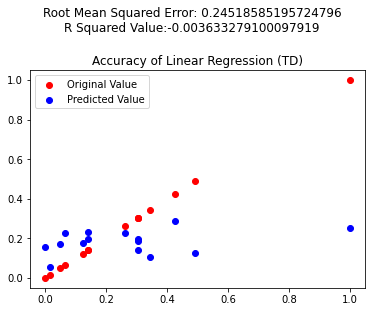

In [26]:
linearRegression(X_train,y_train,x_test,y_test,"CDR")
x=allmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
linearRegression(X_train,y_train,x_test,y_test,"TD")

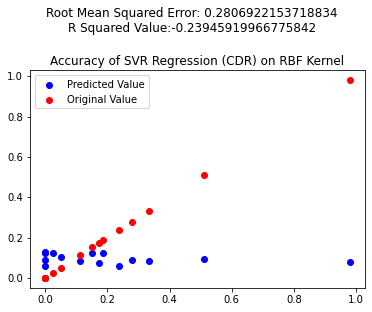

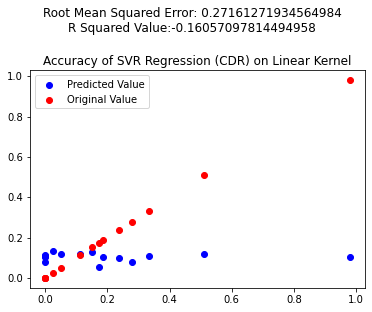

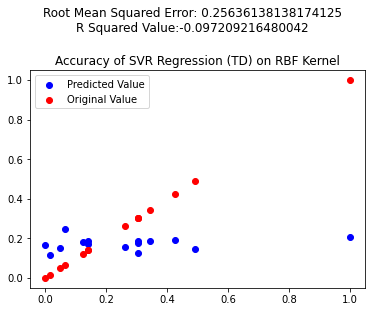

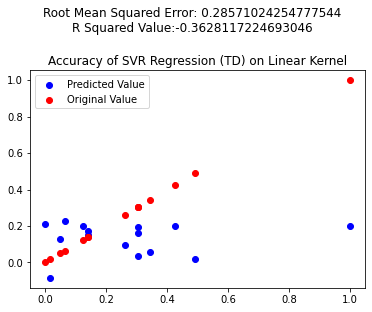

In [27]:
x=allmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
svrRegression(X_train,y_train,x_test,y_test,"CDR")
x=allmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
svrRegression(X_train,y_train,x_test,y_test,"TD")

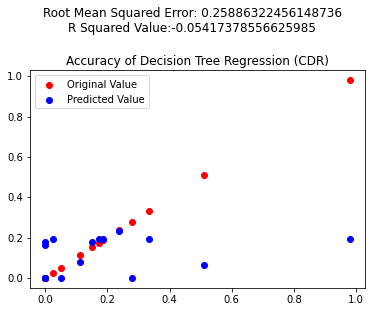

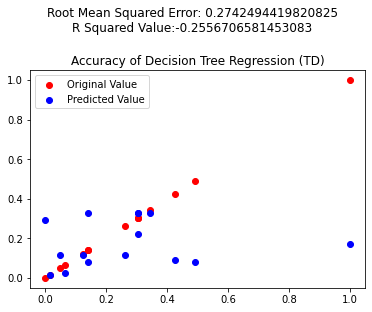

In [28]:
x=allmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
decisionTreeRegression(X_train,y_train,x_test,y_test,"CDR")
x=allmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
decisionTreeRegression(X_train,y_train,x_test,y_test,"TD")

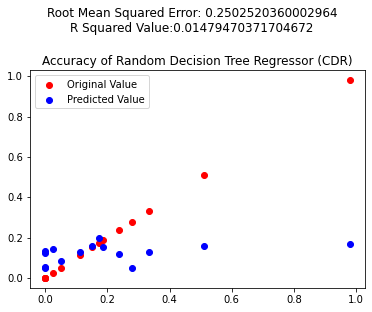

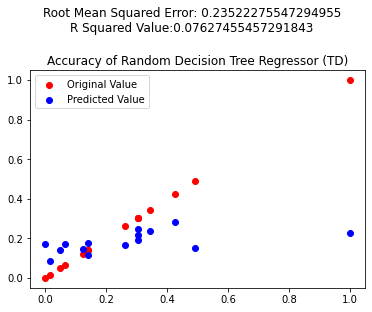

In [29]:
x=allmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
randomDecTreeRegression(X_train,y_train,x_test,y_test,"CDR")
x=allmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
randomDecTreeRegression(X_train,y_train,x_test,y_test,"TD")

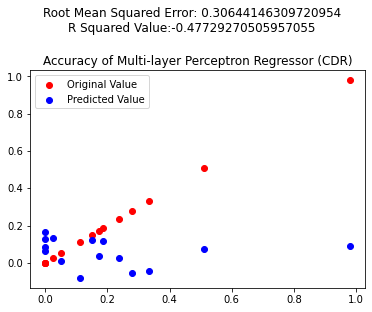

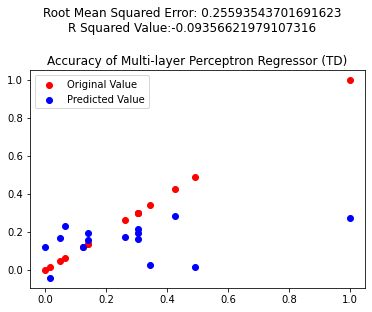

In [30]:
x=allmetrics.to_numpy()
y=tdmetrics["CDR"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
mlpRegressor(X_train,y_train,x_test,y_test,"CDR")
x=allmetrics.to_numpy()
y=tdmetrics["TD"].to_numpy()
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=53)
mlpRegressor(X_train,y_train,x_test,y_test,"TD")